# Analisi Operazioni Giornaliere - Strategia Contrarian Forex

Analisi dettagliata delle operazioni giornaliere e profitti della strategia contrarian su 18 coppie forex usando il portafoglio risk parity ottimizzato.

## Setup e Configurazione

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Import modulo custom
from daily_operations_analyzer import load_and_analyze, calculate_benchmark_comparison

# Configurazione grafici
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Palette colori
colors = plt.cm.tab20(np.linspace(0, 1, 20))
sns.set_palette("husl")

print("🚀 Setup completato - Pronto per l'analisi!")

🚀 Setup completato - Pronto per l'analisi!


## Caricamento Dati e Analisi Completa

In [2]:
# Carica tutti i dati ed esegui analisi completa
print("📊 Caricamento dati e calcolo statistiche...")
analysis = load_and_analyze()

# Estrai componenti principali
portfolio_data = analysis['data']['portfolio']
operations = analysis['operations'] 
pnl_data = analysis['pnl_data']
portfolio_metrics = analysis['portfolio_metrics']
individual_metrics = analysis['individual_metrics']
attribution = analysis['attribution']
rolling_stats = analysis['rolling_stats']
frequency_stats = analysis['frequency_stats']
correlation_matrix = analysis['correlation_matrix']

print(f"✅ Analisi completata per {len(analysis['data']['currencies'])} valute")
print(f"📅 Periodo: {portfolio_data.index.min().strftime('%Y-%m-%d')} - {portfolio_data.index.max().strftime('%Y-%m-%d')}")
print(f"📈 Performance Portfolio: {portfolio_metrics['annualized_return']:.2%} annualizzato")
print(f"📊 Sharpe Ratio: {portfolio_metrics['sharpe_ratio']:.3f}")

📊 Caricamento dati e calcolo statistiche...
✅ Analisi completata per 18 valute
📅 Periodo: 2010-01-01 - 2025-08-06
📈 Performance Portfolio: 1.16% annualizzato
📊 Sharpe Ratio: 0.500


## 1. Overview Timeline: Equity Curve e P&L Giornaliero

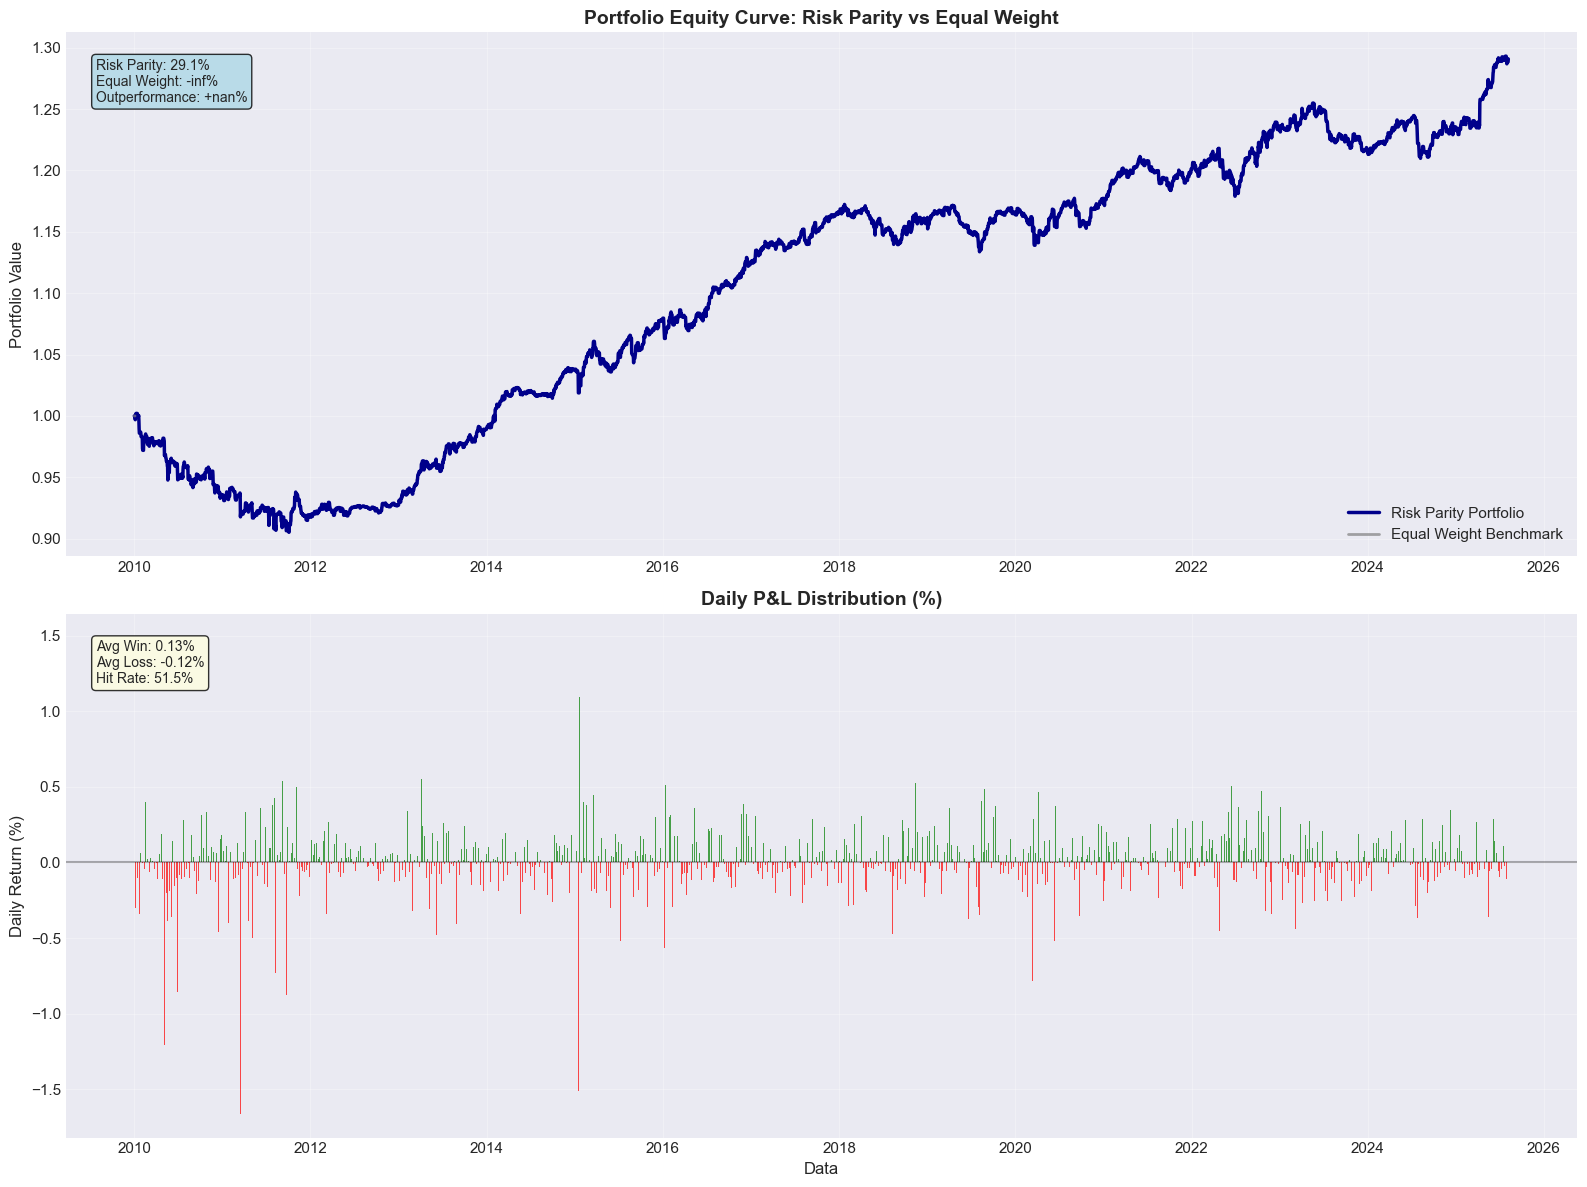

In [3]:
# Timeline Overview: Equity + Daily P&L
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Grafico 1: Portfolio Equity Curve
portfolio_equity = portfolio_data['equity']
ax1.plot(portfolio_equity.index, portfolio_equity.values, 
         linewidth=2.5, color='darkblue', label='Risk Parity Portfolio')

# Aggiungi benchmark equal weight
benchmark_data = calculate_benchmark_comparison(
    pnl_data['portfolio_pnl'], 
    analysis['data']['individual_equity']
)
ew_equity = (1 + benchmark_data['equal_weight_returns']).cumprod()
ax1.plot(ew_equity.index, ew_equity.values, 
         linewidth=2, color='gray', alpha=0.7, label='Equal Weight Benchmark')

ax1.set_title('Portfolio Equity Curve: Risk Parity vs Equal Weight', fontweight='bold')
ax1.set_ylabel('Portfolio Value')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Statistiche performance
final_rp = portfolio_equity.iloc[-1]
final_ew = ew_equity.iloc[-1] 
outperformance = (final_rp - final_ew) / final_ew * 100

ax1.text(0.02, 0.95, f'Risk Parity: {(final_rp-1)*100:.1f}%\nEqual Weight: {(final_ew-1)*100:.1f}%\nOutperformance: {outperformance:+.1f}%', 
         transform=ax1.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Grafico 2: Daily P&L
daily_pnl = pnl_data['portfolio_pnl'] * 100  # Converti in percentuale
colors_pnl = ['green' if x > 0 else 'red' if x < 0 else 'gray' for x in daily_pnl]

ax2.bar(daily_pnl.index, daily_pnl.values, color=colors_pnl, alpha=0.7, width=1)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)

ax2.set_title('Daily P&L Distribution (%)', fontweight='bold')
ax2.set_xlabel('Data')
ax2.set_ylabel('Daily Return (%)')
ax2.grid(True, alpha=0.3)

# Statistiche P&L
avg_win = daily_pnl[daily_pnl > 0].mean()
avg_loss = daily_pnl[daily_pnl < 0].mean()
hit_rate = (daily_pnl > 0).sum() / len(daily_pnl[daily_pnl != 0])

ax2.text(0.02, 0.95, f'Avg Win: {avg_win:.2f}%\nAvg Loss: {avg_loss:.2f}%\nHit Rate: {hit_rate:.1%}', 
         transform=ax2.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

## 2. Heatmap Operazioni: Quando Ogni Valuta è Attiva

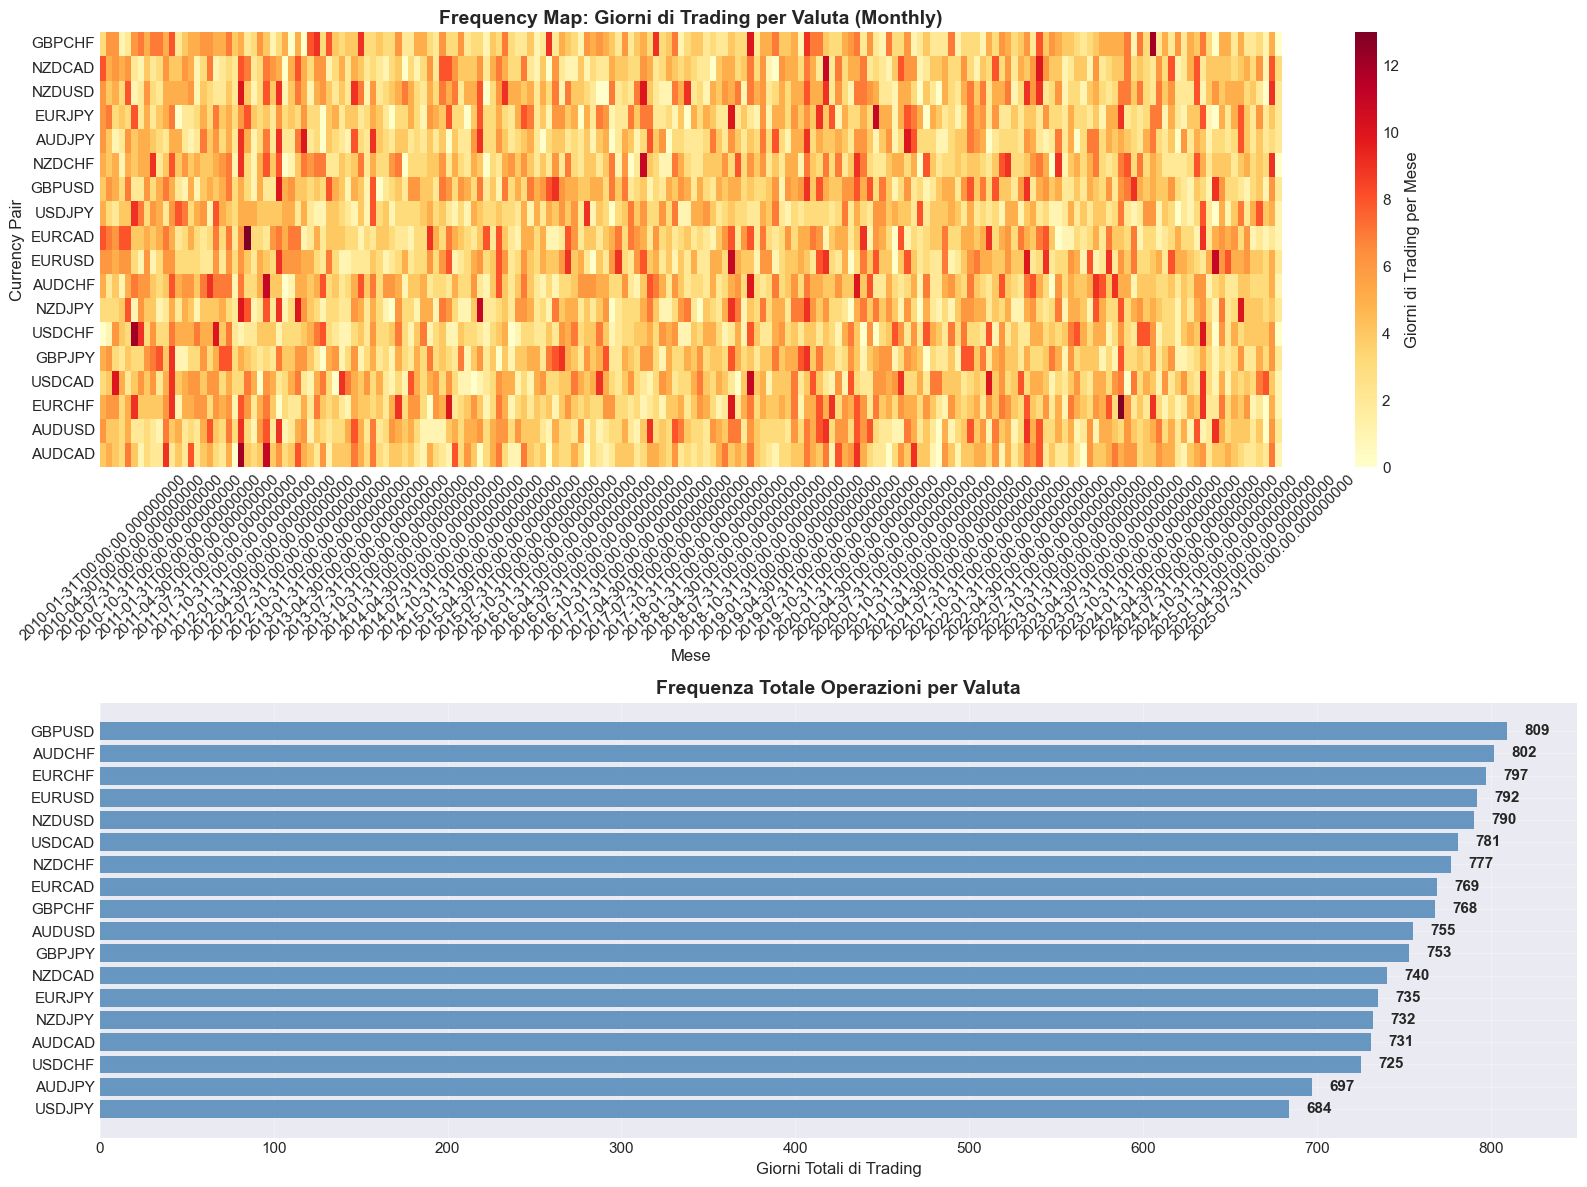

📊 Valuta più attiva: GBPUSD (809 giorni)
📊 Valuta meno attiva: USDJPY (684 giorni)


In [4]:
# Operations Heatmap Calendar Style
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Grafico 1: Heatmap Operazioni per Valuta
operations_monthly = operations.resample('M').sum()
operations_plot = operations_monthly.T  # Trasponi per avere valute su y-axis

# Abbrevia nomi valute per il plot
currency_names = [c.replace('=X', '').replace('_X', '') for c in operations_plot.index]
operations_plot.index = currency_names

sns.heatmap(operations_plot, 
           cmap='YlOrRd', 
           ax=ax1,
           cbar_kws={'label': 'Giorni di Trading per Mese'})

ax1.set_title('Frequency Map: Giorni di Trading per Valuta (Monthly)', fontweight='bold')
ax1.set_xlabel('Mese')
ax1.set_ylabel('Currency Pair')

# Ruota le etichette x per leggibilità
ax1.tick_params(axis='x', rotation=45)

# Grafico 2: Frequenza Totale Operazioni per Valuta
total_operations = operations.sum().sort_values(ascending=True)
total_operations.index = [c.replace('=X', '').replace('_X', '') for c in total_operations.index]

bars = ax2.barh(range(len(total_operations)), total_operations.values, color='steelblue', alpha=0.8)
ax2.set_yticks(range(len(total_operations)))
ax2.set_yticklabels(total_operations.index)
ax2.set_xlabel('Giorni Totali di Trading')
ax2.set_title('Frequenza Totale Operazioni per Valuta', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Aggiungi valori sulle barre
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width + 10, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"📊 Valuta più attiva: {total_operations.index[-1]} ({total_operations.iloc[-1]} giorni)")
print(f"📊 Valuta meno attiva: {total_operations.index[0]} ({total_operations.iloc[0]} giorni)")

## 3. Distribuzione P&L Giornalieri e Risk Analysis

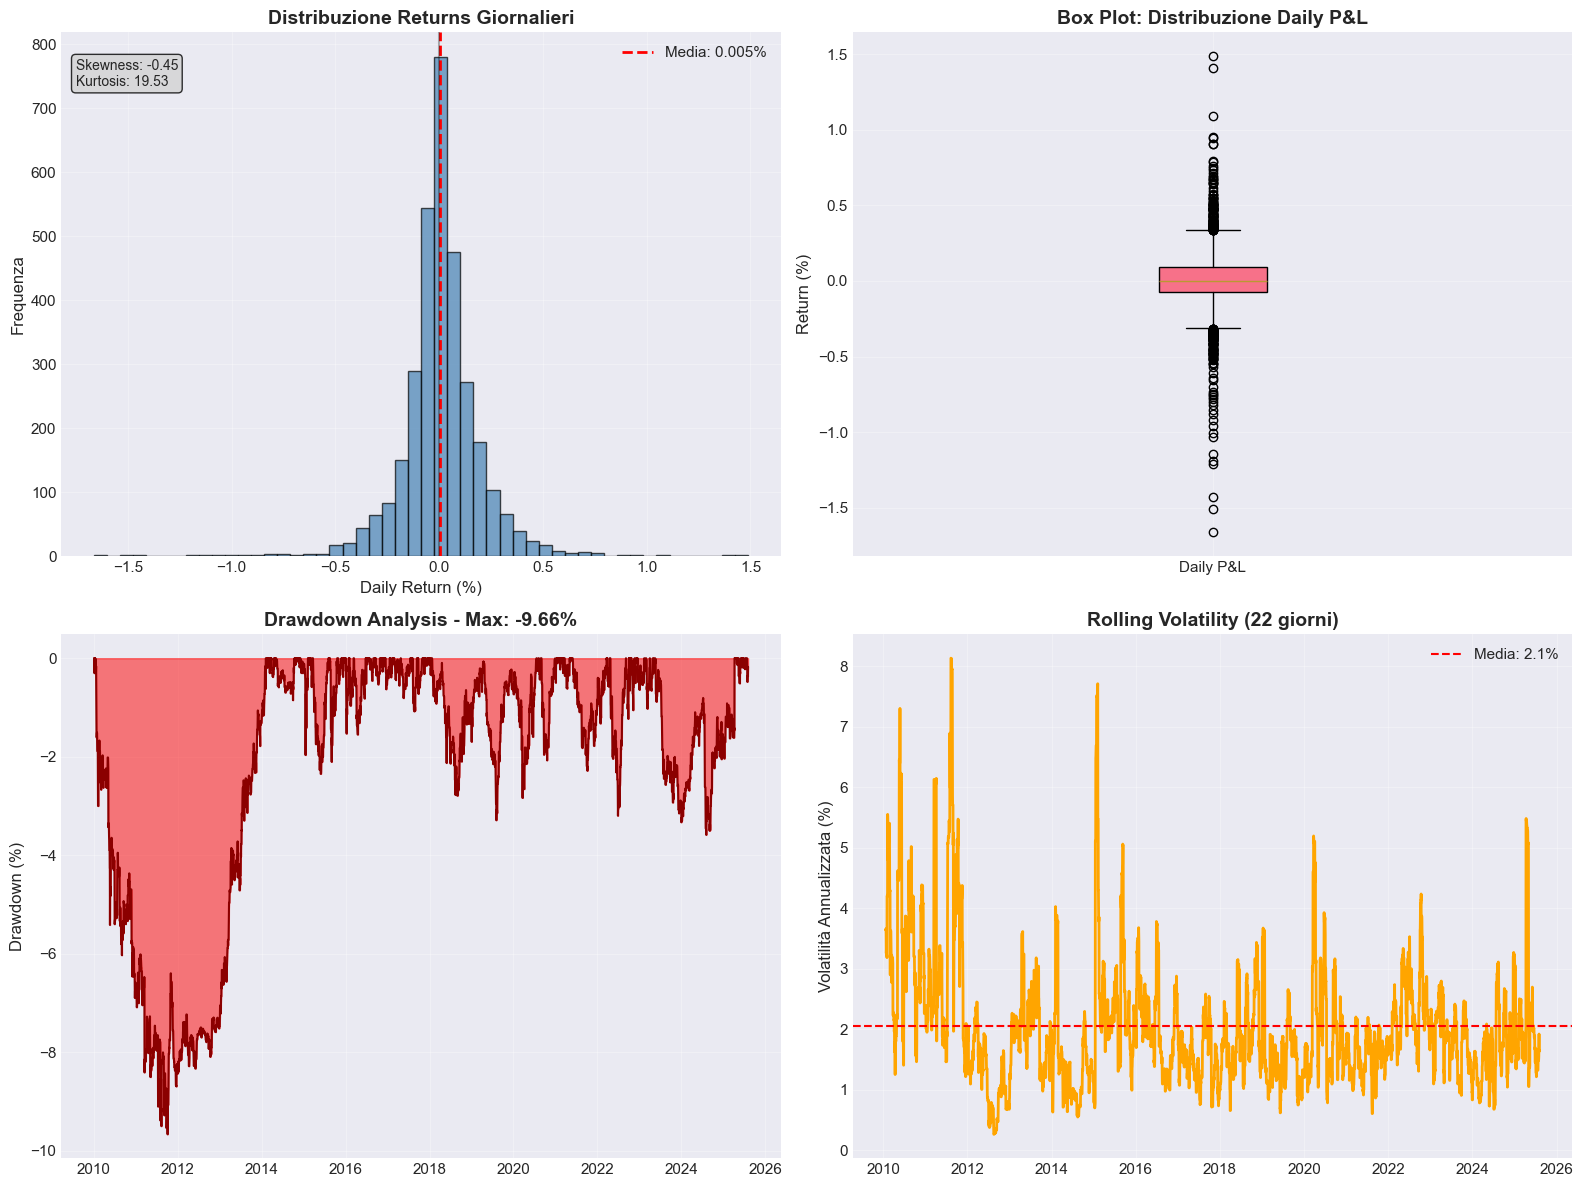

In [5]:
# P&L Distribution Analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

daily_pnl_pct = pnl_data['portfolio_pnl'] * 100

# Grafico 1: Istogramma Distribuzione P&L
ax1.hist(daily_pnl_pct[daily_pnl_pct != 0], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
ax1.axvline(daily_pnl_pct.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {daily_pnl_pct.mean():.3f}%')
ax1.axvline(0, color='black', linestyle='-', alpha=0.3)
ax1.set_xlabel('Daily Return (%)')
ax1.set_ylabel('Frequenza')
ax1.set_title('Distribuzione Returns Giornalieri', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Statistiche distribuzione
skewness = daily_pnl_pct.skew()
kurtosis = daily_pnl_pct.kurtosis()
ax1.text(0.02, 0.95, f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}', 
         transform=ax1.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

# Grafico 2: Box Plot P&L per Quartili
quarterly_returns = daily_pnl_pct.resample('Q').apply(lambda x: x.sum())
ax2.boxplot([daily_pnl_pct[daily_pnl_pct != 0]], labels=['Daily P&L'], patch_artist=True)
ax2.set_ylabel('Return (%)')
ax2.set_title('Box Plot: Distribuzione Daily P&L', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Grafico 3: Drawdown Analysis
equity_curve = (1 + pnl_data['portfolio_pnl']).cumprod()
rolling_max = equity_curve.expanding().max()
drawdown = (equity_curve - rolling_max) / rolling_max * 100

ax3.fill_between(drawdown.index, drawdown.values, 0, color='red', alpha=0.5)
ax3.plot(drawdown.index, drawdown.values, color='darkred', linewidth=1.5)
ax3.set_ylabel('Drawdown (%)')
ax3.set_title(f'Drawdown Analysis - Max: {drawdown.min():.2f}%', fontweight='bold')
ax3.grid(True, alpha=0.3)

# Grafico 4: Rolling Volatility
rolling_vol = daily_pnl_pct.rolling(window=22).std() * np.sqrt(252)  # Annualized
ax4.plot(rolling_vol.index, rolling_vol.values, color='orange', linewidth=2)
ax4.axhline(rolling_vol.mean(), color='red', linestyle='--', 
           label=f'Media: {rolling_vol.mean():.1f}%')
ax4.set_ylabel('Volatilità Annualizzata (%)')
ax4.set_title('Rolling Volatility (22 giorni)', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Performance Attribution: Contributo per Valuta

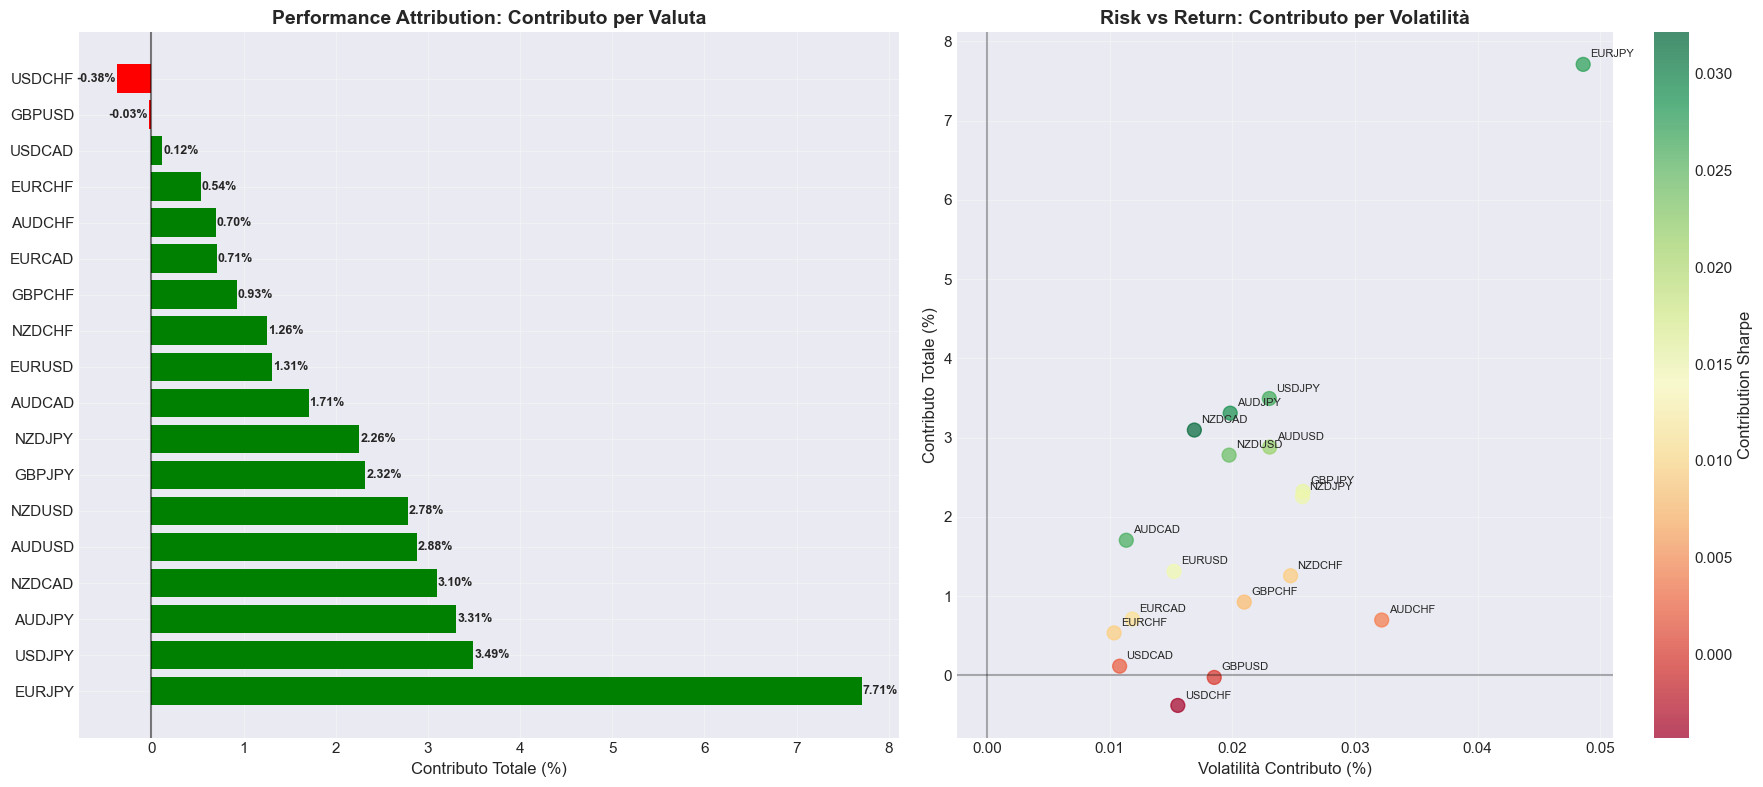

🏆 TOP 3 CONTRIBUTORS:
  1. EURJPY: 7.71% (Sharpe: 0.028)
  2. USDJPY: 3.49% (Sharpe: 0.027)
  3. AUDJPY: 3.31% (Sharpe: 0.029)


In [6]:
# Performance Attribution Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Grafico 1: Contributo Totale per Valuta
if len(attribution) > 0:
    # Abbrevia nomi per visualizzazione
    attribution_plot = attribution.copy()
    attribution_plot['Currency_Short'] = attribution_plot['Currency'].str.replace('=X', '').str.replace('_X', '')
    
    # Bar chart contributi totali
    bars = ax1.barh(attribution_plot['Currency_Short'], 
                    attribution_plot['Total_Contribution'] * 100,  # Converti in %
                    color=['green' if x > 0 else 'red' for x in attribution_plot['Total_Contribution']])
    
    ax1.set_xlabel('Contributo Totale (%)')
    ax1.set_title('Performance Attribution: Contributo per Valuta', fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.axvline(0, color='black', linestyle='-', alpha=0.5)
    
    # Aggiungi valori sulle barre
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax1.text(width + (0.01 if width > 0 else -0.01), bar.get_y() + bar.get_height()/2, 
                 f'{width:.2f}%', ha='left' if width > 0 else 'right', va='center', 
                 fontweight='bold', fontsize=9)
    
    # Grafico 2: Risk-Adjusted Attribution (Contribution Sharpe)
    ax2.scatter(attribution_plot['Volatility_Contribution'] * 100, 
               attribution_plot['Total_Contribution'] * 100,
               s=100, alpha=0.7, c=attribution_plot['Contribution_Sharpe'], 
               cmap='RdYlGn')
    
    # Aggiungi etichette
    for i, row in attribution_plot.iterrows():
        ax2.annotate(row['Currency_Short'], 
                    (row['Volatility_Contribution'] * 100, row['Total_Contribution'] * 100),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    ax2.set_xlabel('Volatilità Contributo (%)')
    ax2.set_ylabel('Contributo Totale (%)')
    ax2.set_title('Risk vs Return: Contributo per Volatilità', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.axhline(0, color='black', linestyle='-', alpha=0.3)
    ax2.axvline(0, color='black', linestyle='-', alpha=0.3)
    
    plt.colorbar(ax2.collections[0], ax=ax2, label='Contribution Sharpe')

plt.tight_layout()
plt.show()

# Stampa top performers
if len(attribution) > 0:
    print("🏆 TOP 3 CONTRIBUTORS:")
    for i in range(min(3, len(attribution))):
        row = attribution.iloc[i]
        currency_clean = row['Currency'].replace('=X', '').replace('_X', '')
        print(f"  {i+1}. {currency_clean}: {row['Total_Contribution']*100:.2f}% (Sharpe: {row['Contribution_Sharpe']:.3f})")

## 5. Rolling Performance Analysis

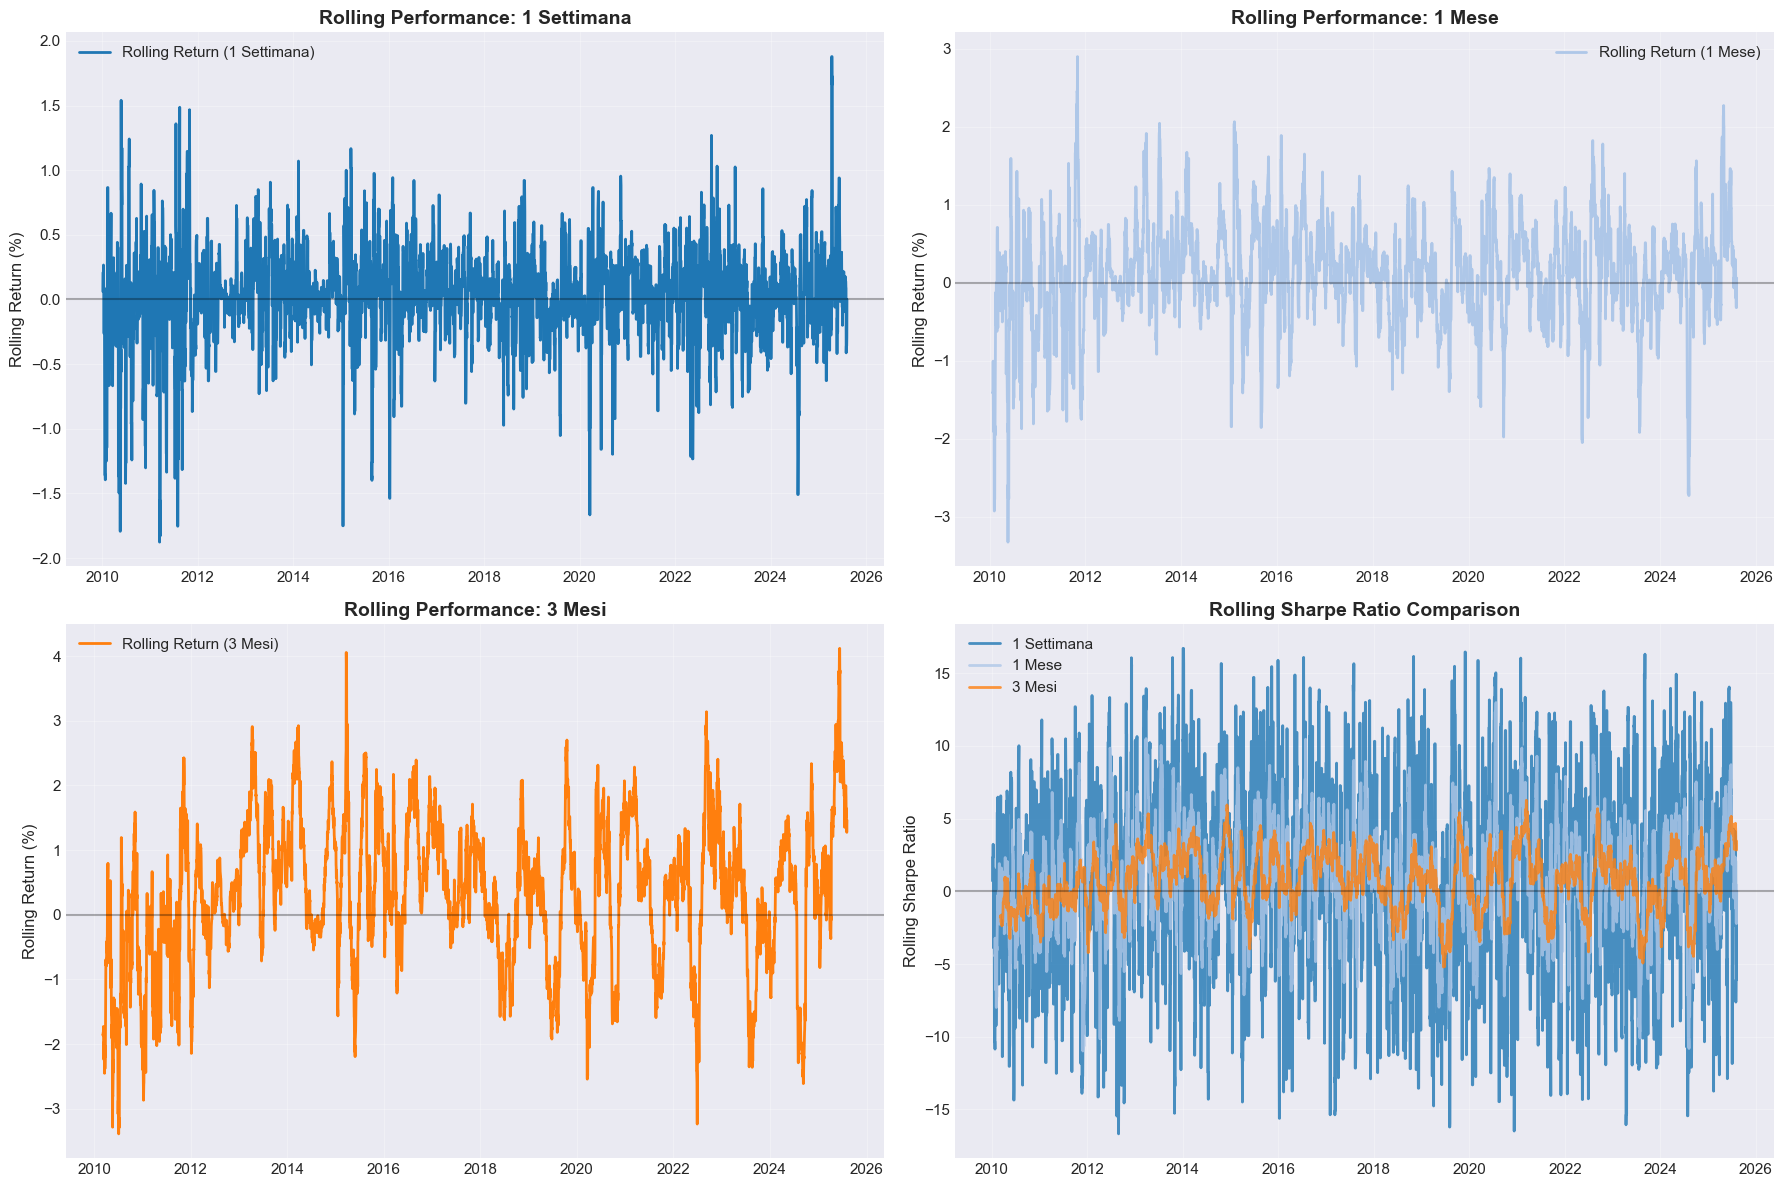

In [7]:
# Rolling Performance Analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Flattening per facilitare iterazione
axes = axes.flatten()

windows = ['7d', '22d', '66d']
window_labels = ['1 Settimana', '1 Mese', '3 Mesi']

for i, (window, label) in enumerate(zip(windows, window_labels)):
    if window in rolling_stats and i < 3:
        rolling_data = rolling_stats[window]
        
        # Rolling Returns
        axes[i].plot(rolling_data.index, rolling_data['Rolling_Return'] * 100, 
                    linewidth=2, label=f'Rolling Return ({label})', color=colors[i])
        axes[i].axhline(0, color='black', linestyle='-', alpha=0.3)
        axes[i].set_ylabel('Rolling Return (%)')
        axes[i].set_title(f'Rolling Performance: {label}', fontweight='bold')
        axes[i].grid(True, alpha=0.3)
        axes[i].legend()

# Quarto grafico: Rolling Sharpe Comparison
ax4 = axes[3]
for i, (window, label) in enumerate(zip(windows, window_labels)):
    if window in rolling_stats:
        rolling_data = rolling_stats[window]
        ax4.plot(rolling_data.index, rolling_data['Rolling_Sharpe'], 
                linewidth=2, label=f'{label}', alpha=0.8, color=colors[i])

ax4.axhline(0, color='black', linestyle='-', alpha=0.3)
ax4.set_ylabel('Rolling Sharpe Ratio')
ax4.set_title('Rolling Sharpe Ratio Comparison', fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()

## 6. Individual Currency Performance

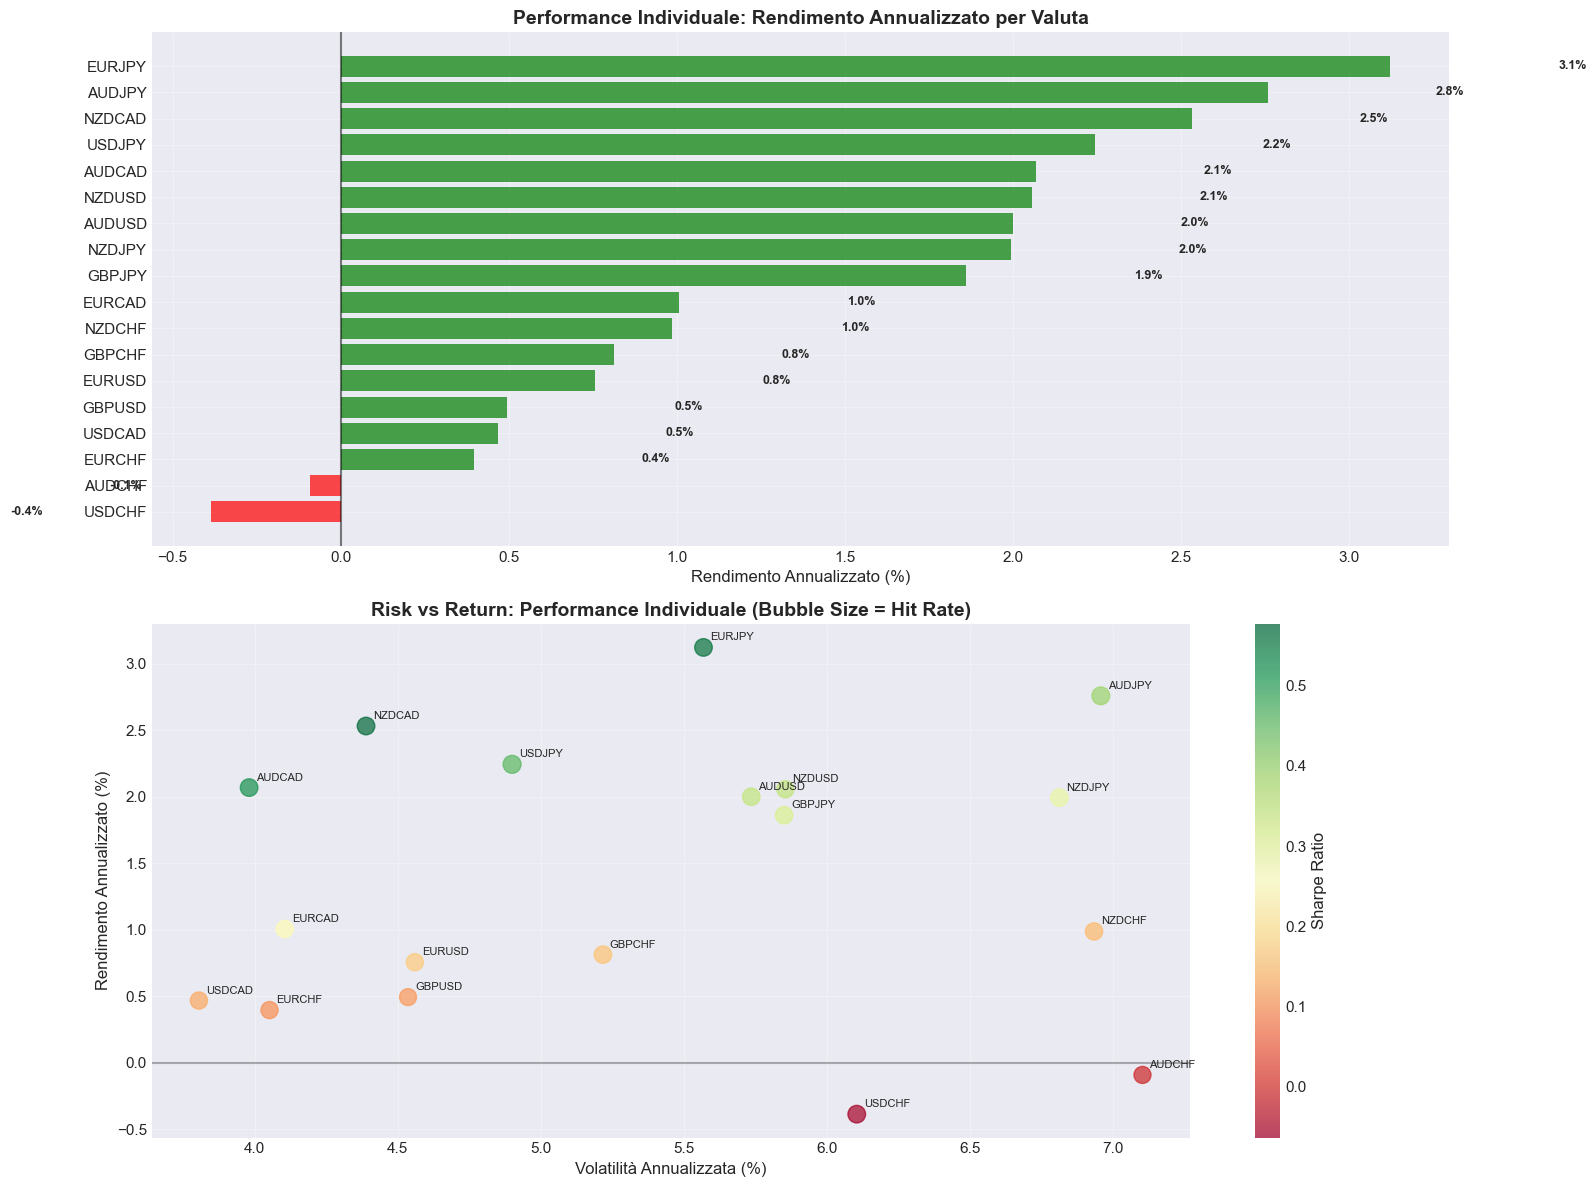

🏆 Miglior Return: EURJPY (3.12%)
🏆 Miglior Sharpe: NZDCAD (0.577)


In [8]:
# Individual Currency Performance Analysis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Prepara dati per plotting
currency_performance = []
for currency, metrics in individual_metrics.items():
    currency_clean = currency.replace('=X', '').replace('_X', '')
    currency_performance.append({
        'Currency': currency_clean,
        'Annual_Return': metrics['annualized_return'] * 100,
        'Volatility': metrics['volatility'] * 100,
        'Sharpe_Ratio': metrics['sharpe_ratio'],
        'Max_Drawdown': metrics['max_drawdown'] * 100,
        'Hit_Rate': metrics['hit_rate'] * 100
    })

perf_df = pd.DataFrame(currency_performance).sort_values('Annual_Return', ascending=True)

# Grafico 1: Annual Return per Currency
colors_returns = ['green' if x > 0 else 'red' for x in perf_df['Annual_Return']]
bars1 = ax1.barh(perf_df['Currency'], perf_df['Annual_Return'], 
                 color=colors_returns, alpha=0.7)
ax1.set_xlabel('Rendimento Annualizzato (%)')
ax1.set_title('Performance Individuale: Rendimento Annualizzato per Valuta', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axvline(0, color='black', linestyle='-', alpha=0.5)

# Aggiungi valori
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + (0.5 if width > 0 else -0.5), bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}%', ha='left' if width > 0 else 'right', va='center', 
             fontweight='bold', fontsize=9)

# Grafico 2: Risk-Return Scatter
scatter = ax2.scatter(perf_df['Volatility'], perf_df['Annual_Return'], 
                     s=perf_df['Hit_Rate']*3, # Size = hit rate
                     c=perf_df['Sharpe_Ratio'], 
                     cmap='RdYlGn', alpha=0.7)

# Aggiungi etichette
for i, row in perf_df.iterrows():
    ax2.annotate(row['Currency'], 
                (row['Volatility'], row['Annual_Return']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

ax2.set_xlabel('Volatilità Annualizzata (%)')
ax2.set_ylabel('Rendimento Annualizzato (%)')
ax2.set_title('Risk vs Return: Performance Individuale (Bubble Size = Hit Rate)', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(0, color='black', linestyle='-', alpha=0.3)

plt.colorbar(scatter, ax=ax2, label='Sharpe Ratio')

plt.tight_layout()
plt.show()

# Stampa statistiche
best_return = perf_df.loc[perf_df['Annual_Return'].idxmax()]
best_sharpe = perf_df.loc[perf_df['Sharpe_Ratio'].idxmax()]
print(f"🏆 Miglior Return: {best_return['Currency']} ({best_return['Annual_Return']:.2f}%)")
print(f"🏆 Miglior Sharpe: {best_sharpe['Currency']} ({best_sharpe['Sharpe_Ratio']:.3f})")

## 7. Correlation Analysis

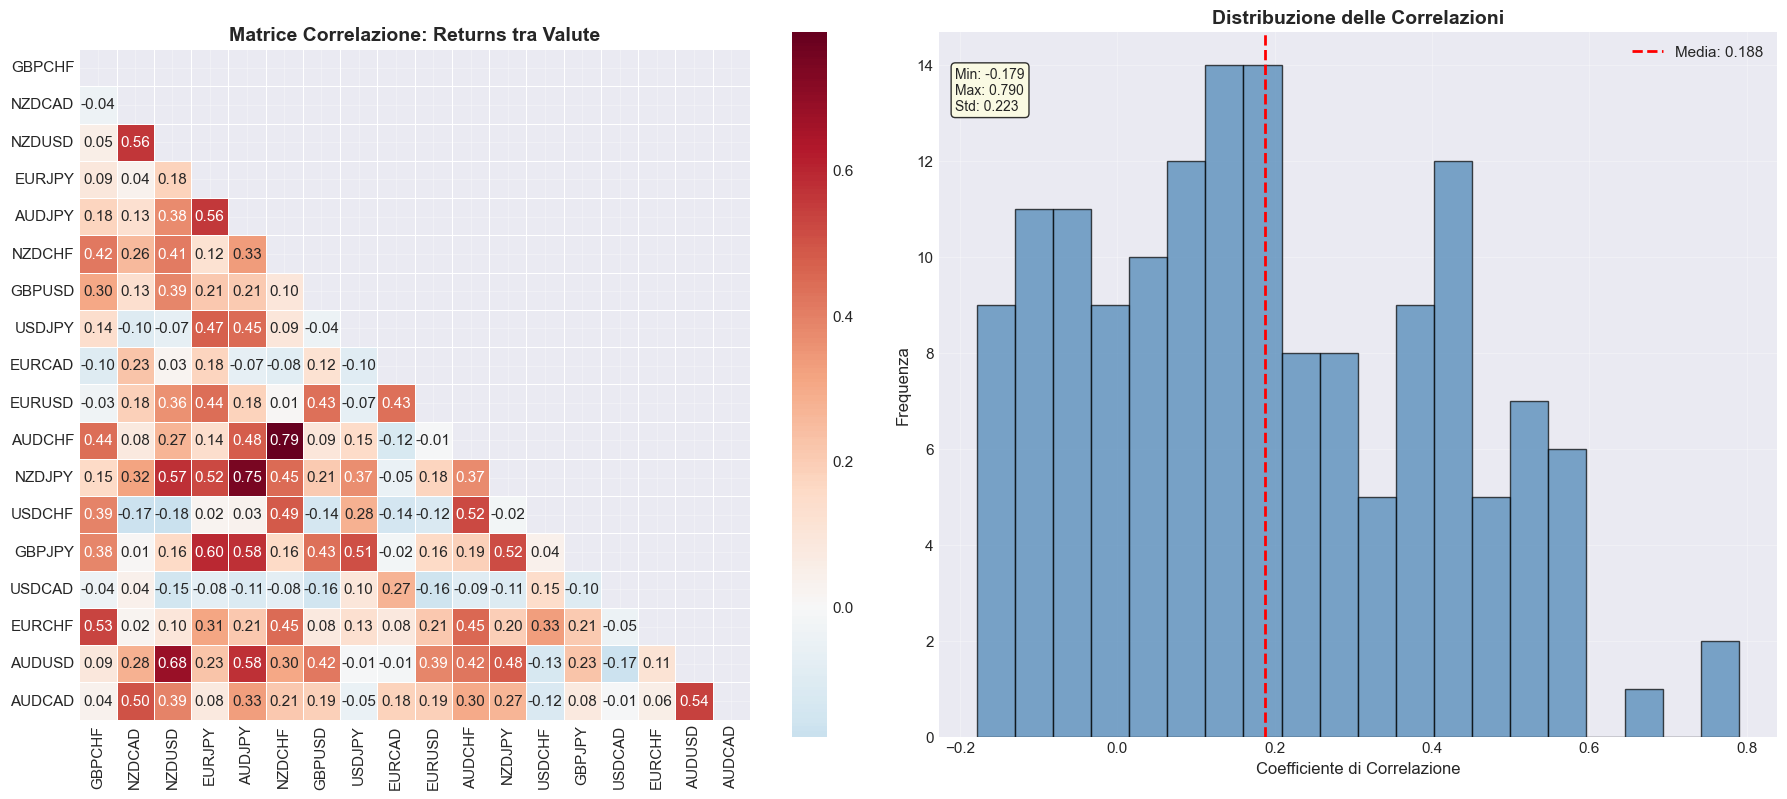

📊 Correlazione media tra valute: 0.188
📊 Range correlazioni: -0.179 - 0.790


In [9]:
# Correlation Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Prepara matrice correlazione per plot
corr_matrix = correlation_matrix.copy()
corr_matrix.index = [c.replace('=X', '').replace('_X', '') for c in corr_matrix.index]
corr_matrix.columns = [c.replace('=X', '').replace('_X', '') for c in corr_matrix.columns]

# Grafico 1: Heatmap Correlazioni
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Maschera triangolare superiore
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
           square=True, linewidths=0.5, ax=ax1, fmt='.2f')
ax1.set_title('Matrice Correlazione: Returns tra Valute', fontweight='bold')

# Grafico 2: Distribuzione Correlazioni
# Estrai correlazioni (escludendo diagonale)
correlations = corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)]
correlations = correlations[~np.isnan(correlations)]  # Rimuovi NaN

ax2.hist(correlations, bins=20, alpha=0.7, color='steelblue', edgecolor='black')
ax2.axvline(correlations.mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Media: {correlations.mean():.3f}')
ax2.set_xlabel('Coefficiente di Correlazione')
ax2.set_ylabel('Frequenza')
ax2.set_title('Distribuzione delle Correlazioni', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Statistiche correlazione
ax2.text(0.02, 0.95, f'Min: {correlations.min():.3f}\nMax: {correlations.max():.3f}\nStd: {correlations.std():.3f}', 
         transform=ax2.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"📊 Correlazione media tra valute: {correlations.mean():.3f}")
print(f"📊 Range correlazioni: {correlations.min():.3f} - {correlations.max():.3f}")

## 8. Summary Dashboard: Metriche Chiave

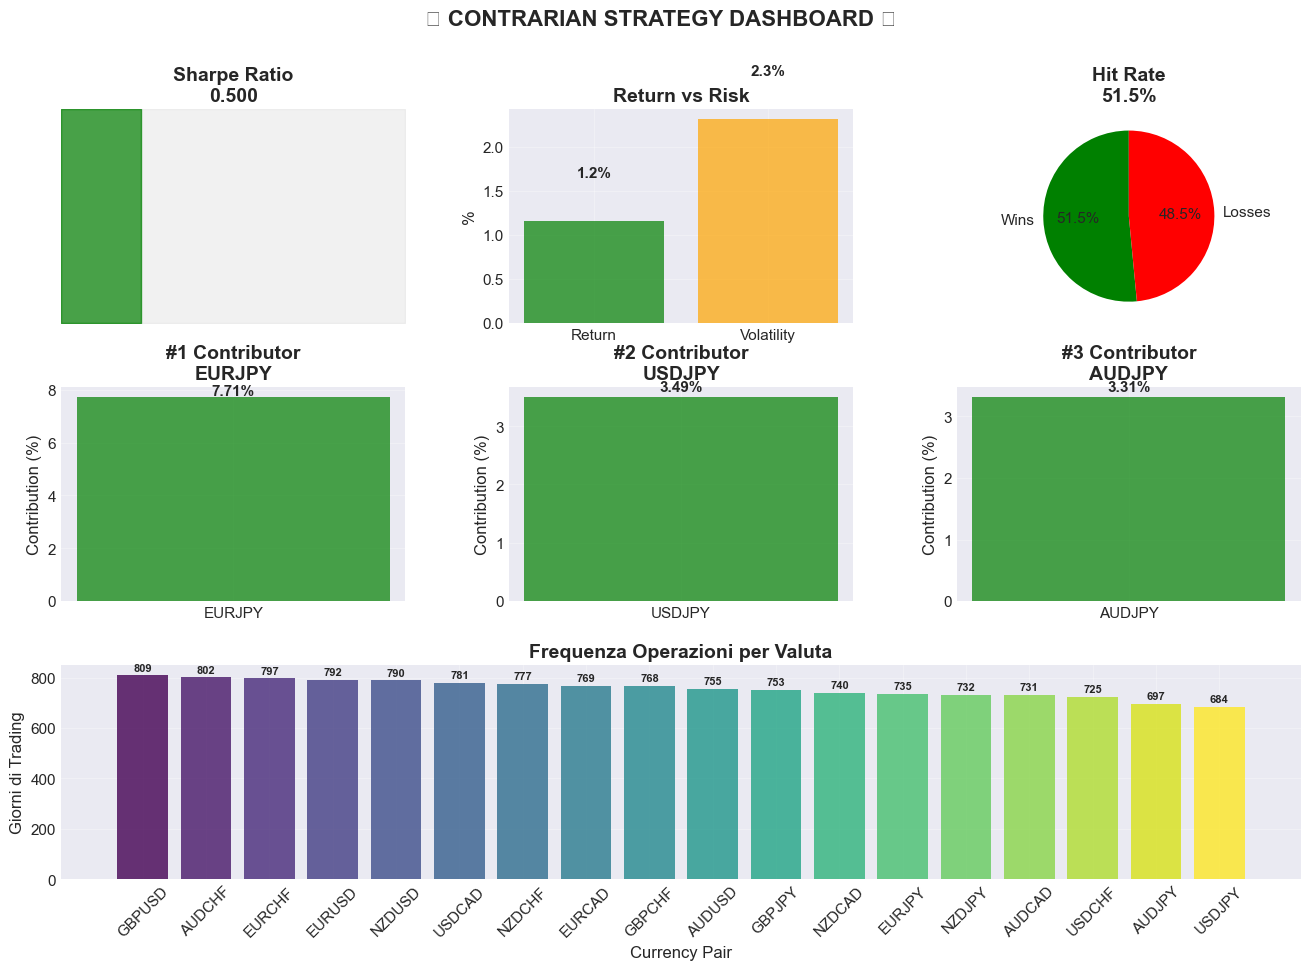


📈 SUMMARY STATISTICS - CONTRARIAN FOREX STRATEGY
📅 Periodo Analisi: 2010-01-01 - 2025-08-06
🏦 Valute Analizzate: 18
📊 Giorni Totali: 5697

💰 PERFORMANCE:
   • Return Annualizzato: 1.16%
   • Volatilità: 2.31%
   • Sharpe Ratio: 0.500
   • Max Drawdown: -9.66%
   • Hit Rate: 51.5%
   • Win/Loss Ratio: 1.07

🏆 TOP PERFORMER: EURJPY
📉 WORST PERFORMER: USDCHF


In [10]:
# Summary Dashboard
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Metriche principali
portfolio_return = portfolio_metrics['annualized_return'] * 100
portfolio_vol = portfolio_metrics['volatility'] * 100
portfolio_sharpe = portfolio_metrics['sharpe_ratio']
portfolio_dd = portfolio_metrics['max_drawdown'] * 100
portfolio_hit_rate = portfolio_metrics['hit_rate'] * 100

# Grafico 1: Gauge Chart per Sharpe Ratio
ax1 = fig.add_subplot(gs[0, 0])
theta = np.linspace(0, np.pi, 100)
sharpe_normalized = min(max(portfolio_sharpe, 0), 2) / 2  # Normalizza 0-2
ax1.fill_between(theta, 0, 1, alpha=0.3, color='lightgray')
ax1.fill_between(theta[:int(sharpe_normalized*100)], 0, 1, alpha=0.7, color='green')
ax1.set_ylim(0, 1)
ax1.set_xlim(0, np.pi)
ax1.set_title(f'Sharpe Ratio\n{portfolio_sharpe:.3f}', fontweight='bold')
ax1.axis('off')

# Grafico 2: Return vs Volatility
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(['Return', 'Volatility'], [portfolio_return, portfolio_vol], 
        color=['green', 'orange'], alpha=0.7)
ax2.set_ylabel('%')
ax2.set_title('Return vs Risk', fontweight='bold')
ax2.grid(True, alpha=0.3)
for i, v in enumerate([portfolio_return, portfolio_vol]):
    ax2.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

# Grafico 3: Hit Rate Pie Chart
ax3 = fig.add_subplot(gs[0, 2])
hit_data = [portfolio_hit_rate, 100 - portfolio_hit_rate]
colors_pie = ['green', 'red']
ax3.pie(hit_data, labels=['Wins', 'Losses'], colors=colors_pie, autopct='%1.1f%%',
        startangle=90)
ax3.set_title(f'Hit Rate\n{portfolio_hit_rate:.1f}%', fontweight='bold')

# Grafico 4-6: Top 3 Contributors
if len(attribution) >= 3:
    for i in range(3):
        ax = fig.add_subplot(gs[1, i])
        row = attribution.iloc[i]
        currency_name = row['Currency'].replace('=X', '').replace('_X', '')
        contribution = row['Total_Contribution'] * 100
        
        ax.bar([currency_name], [contribution], 
               color='green' if contribution > 0 else 'red', alpha=0.7)
        ax.set_title(f'#{i+1} Contributor\n{currency_name}', fontweight='bold')
        ax.set_ylabel('Contribution (%)')
        ax.text(0, contribution + (0.1 if contribution > 0 else -0.1), 
                f'{contribution:.2f}%', ha='center', fontweight='bold')
        ax.grid(True, alpha=0.3)

# Grafico 7: Frequency Analysis
ax7 = fig.add_subplot(gs[2, :])
total_ops_df = pd.DataFrame([(k.replace('=X', '').replace('_X', ''), v['total_operations']) 
                            for k, v in frequency_stats.items()], 
                           columns=['Currency', 'Operations'])
total_ops_df = total_ops_df.sort_values('Operations', ascending=False)

bars = ax7.bar(total_ops_df['Currency'], total_ops_df['Operations'], 
              color=plt.cm.viridis(np.linspace(0, 1, len(total_ops_df))), alpha=0.8)
ax7.set_xlabel('Currency Pair')
ax7.set_ylabel('Giorni di Trading')
ax7.set_title('Frequenza Operazioni per Valuta', fontweight='bold')
ax7.tick_params(axis='x', rotation=45)
ax7.grid(True, alpha=0.3)

# Aggiungi valori sulle barre
for bar in bars:
    height = bar.get_height()
    ax7.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=8)

plt.suptitle('📊 CONTRARIAN STRATEGY DASHBOARD 📊', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Summary Statistics
print("\n" + "="*60)
print("📈 SUMMARY STATISTICS - CONTRARIAN FOREX STRATEGY")
print("="*60)
print(f"📅 Periodo Analisi: {portfolio_data.index.min().strftime('%Y-%m-%d')} - {portfolio_data.index.max().strftime('%Y-%m-%d')}")
print(f"🏦 Valute Analizzate: {len(analysis['data']['currencies'])}")
print(f"📊 Giorni Totali: {len(portfolio_data)}")
print(f"")
print(f"💰 PERFORMANCE:")
print(f"   • Return Annualizzato: {portfolio_return:.2f}%")
print(f"   • Volatilità: {portfolio_vol:.2f}%")
print(f"   • Sharpe Ratio: {portfolio_sharpe:.3f}")
print(f"   • Max Drawdown: {portfolio_dd:.2f}%")
print(f"   • Hit Rate: {portfolio_hit_rate:.1f}%")
print(f"   • Win/Loss Ratio: {portfolio_metrics['win_loss_ratio']:.2f}")
print(f"")
print(f"🏆 TOP PERFORMER: {attribution.iloc[0]['Currency'].replace('=X', '').replace('_X', '') if len(attribution) > 0 else 'N/A'}")
print(f"📉 WORST PERFORMER: {attribution.iloc[-1]['Currency'].replace('=X', '').replace('_X', '') if len(attribution) > 0 else 'N/A'}")
print("="*60)